### <span style="color:#45fba2">Importing Necessary Modules : -

In [3005]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix

#### Importing the Dataset

In [3006]:
df=pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv',index_col=False)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Columns

In [3007]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

##### Dataset Shape

In [3008]:
df.shape

(768, 9)

#### Statistical Summary

In [3009]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Correlation Heatmap of Fetures

In [3010]:
# plt.figure(figsize=(16,16))
# corm=df.corr()
# top_cor_feature=corm.index
# g=sns.heatmap(df[top_cor_feature].corr(),cmap='RdYlGn',annot=True)

#### Checking for Missing Values

In [3011]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Unique Value counts column-wise.. Because there may not be missing values but there may be Human erros like puntuation[?,:]

In [3012]:
# col=df.columns.values
# for i in col:
#     print('--'*20,i,'--'*20,'\n',df[i].unique())
#     print('--'*20,i+'Value_counts','--'*20)
#     print(df[i].unique())

### Boxplot for all features

In [3013]:
def outplot():
    f, axes = plt.subplots(4, 2,figsize=(18,50))
    j=0
    k=0
    for i in range(0,8):
       # sns.boxplot(x=df.iloc[:,i],orient='v' , ax=axes[j,k])
        sns.boxplot(x=df.iloc[:,i],orient='v' , ax=axes[j,k])

        

### Statistical infomration about the dataset

In [3014]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Inter quartiule range removal technique

In [3015]:
def qua(col):
    k=[]
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    upper= q3 + (1.5 * iqr)
    lower= q1 - (1.5 * iqr)
    
    for i in df[col]:
        if i > upper or i < lower:
            k.append(i)
    return min(k),max(k)
    
    



### Mean Imputation technique

In [3016]:
def mi(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    m = np.mean(df[col])
    for i in df[col]:
        if i > Upper_tail or i < Lower_tail:
                df[col] = df[col].replace(i, m)

In [3017]:
def bxcx(px,col):
    data = px[col].values
    px[col], fitted_lambda= scipy.stats.boxcox(data[data > 0])
    sns.boxplot(x=col,data=px)

In [3018]:
# def lg(col):
#     df[col]=np.log10(df[col])
#     sns.distplot(df[col])

### Univariate Analysis : Pregnancies

### Calling the quartile function and filtering the values

<AxesSubplot:xlabel='Pregnancies'>

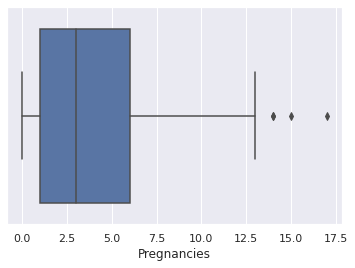

In [3019]:
sns.boxplot(df['Pregnancies'])

#### Unique Values in pregnancies

In [3020]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

### Removing the pregnancies > 9

In [3021]:
df[(df['Pregnancies'] > 8 )]=np.mean(df['Pregnancies'])


### Boxplot Pregnancies

In [3022]:
df['Pregnancies'].value_counts()

1.000000    135
0.000000    111
2.000000    103
3.845052     86
3.000000     75
4.000000     68
5.000000     57
6.000000     50
7.000000     45
8.000000     38
Name: Pregnancies, dtype: int64

<AxesSubplot:xlabel='Pregnancies'>

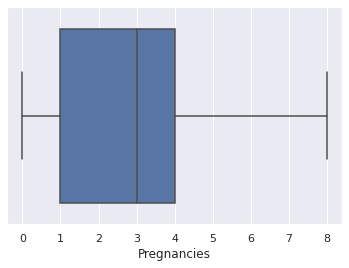

In [3023]:
sns.boxplot(df['Pregnancies'])

#### Skewness|

In [3024]:
df['Pregnancies'].skew()

0.4496476310906112

<AxesSubplot:xlabel='Pregnancies'>

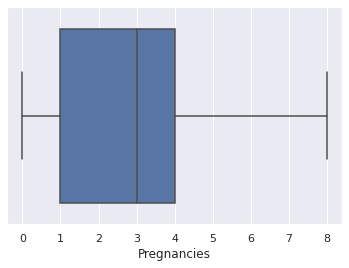

In [3025]:
sns.boxplot(df['Pregnancies'])

### Glucose

In [3026]:
# sorted(df.Glucose.unique())

### Boxplot for glucose

<AxesSubplot:xlabel='Glucose'>

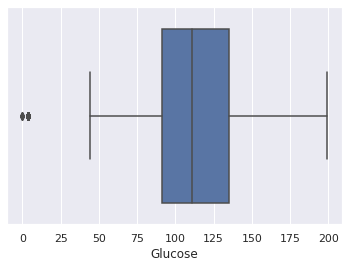

In [3027]:
sns.boxplot(df['Glucose'])

In [3028]:
df[df['Glucose']<=0]=np.median(df['Glucose'])

<AxesSubplot:xlabel='Glucose'>

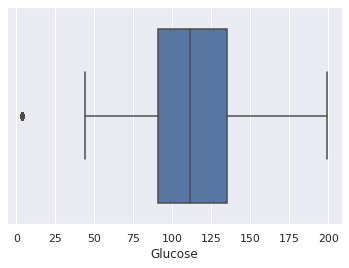

In [3029]:
sns.boxplot(df['Glucose'])


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

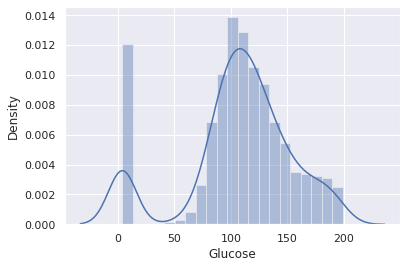

In [3030]:
sns.distplot(df['Glucose'])

### Blood Pressure

In [3031]:
df['BloodPressure'].unique()

array([ 72.        ,  66.        ,  64.        ,  40.        ,
        74.        ,  50.        ,   3.84505208,  70.        ,
        96.        ,  92.        ,  60.        ,   0.        ,
        84.        ,  30.        ,  88.        ,  90.        ,
        76.        ,  75.        ,  58.        ,  68.        ,
        56.        ,  80.        ,  82.        ,  62.        ,
        85.        ,  86.        , 111.        ,  78.        ,
        44.        ,  65.        , 108.        ,  55.        ,
        48.        , 122.        ,  54.        ,  52.        ,
       110.        ,  98.        , 104.        ,  95.        ,
        46.        , 102.        , 100.        ,  61.        ,
        94.        ,  24.        ,  38.        , 106.        ])

In [3032]:
np.mean(df['BloodPressure'])

61.499576144748325

In [3033]:
df[df['BloodPressure']<=0]=np.median(df['BloodPressure'])

<AxesSubplot:xlabel='BloodPressure'>

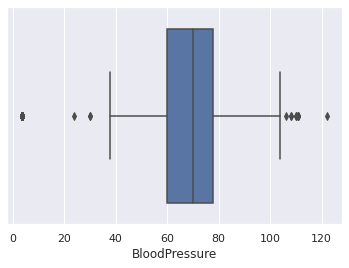

In [3034]:
sns.boxplot(df['BloodPressure'])

In [3035]:
df.drop(df[(df['BloodPressure'] <40 )].index , inplace = True)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

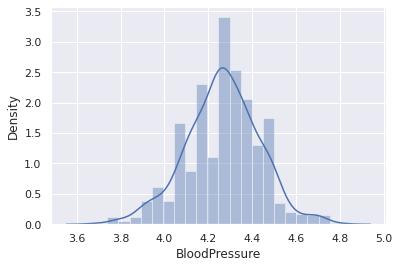

In [3036]:
sns.distplot(np.log(df['BloodPressure']))

In [3037]:
df['BloodPressure'].skew()

0.4895779157861367

### SkinThickness

In [3038]:
df['SkinThickness'][df['SkinThickness']<=0]=np.median(df['SkinThickness'])

In [3039]:
np.mean(df['SkinThickness'])

30.402654867256636

In [3040]:
df['SkinThickness'][df['SkinThickness']>=45]=np.median(df['SkinThickness'])

In [3041]:
df['SkinThickness'][(df['SkinThickness']<20)]=np.median(df['SkinThickness'])

In [3042]:
df['SkinThickness']=np.log(df['SkinThickness'])

In [3043]:
# df.drop(df[(df['SkinThickness'] >3 )].index , inplace = True)


<AxesSubplot:xlabel='SkinThickness'>

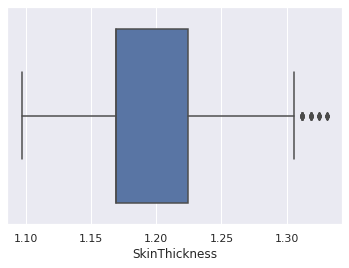

In [3044]:
sns.boxplot(np.log(df['SkinThickness']))

In [3045]:
df['SkinThickness'].skew()

1.034515793615861

### Insulin

#### Unique values for Insulin

In [3046]:
df['Insulin'].unique()

array([  0.,  94., 168.,  88., 543., 846., 175.,  70., 230.,  96., 235.,
       140., 245.,  54., 192., 207.,  82.,  36.,  23., 300., 342., 304.,
       110., 142., 128.,  38., 100.,  90., 270., 111.,  71., 125., 176.,
        48.,  64., 228.,  76., 220.,  40., 152.,  18., 135., 495.,  37.,
        51., 145., 225.,  49.,  50.,  92., 325.,  63., 284., 119., 204.,
       485.,  53., 105., 285., 156.,  78., 130.,  55.,  58., 114., 160.,
       210.,  99., 318.,  44., 190., 280.,  87., 129., 120., 478.,  56.,
        32., 744., 370.,  45., 194., 680., 375.,  67.,  57., 116., 278.,
       155., 545.,  75.,  74., 182., 360., 215.,  42., 148., 180., 205.,
        85., 231.,  68.,  52., 255.,  73., 108.,  83.,  43., 167., 249.,
       293.,  66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415.,
       275., 115., 165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,
        95., 191., 328., 250., 480., 265., 122., 193.,  79.,  86., 326.,
       188., 106.,  65., 166., 274.,  77., 126., 33

#### Treating Data with median imputation

#### Replacing the zero with median vlaues?

In [3047]:
df['Insulin'][df['Insulin']==0]=np.median(df['Insulin'])

### Log transformation of Insulin

In [3048]:
df['Insulin']=np.log(df['Insulin'])

#### Boxplot for Insulin

<AxesSubplot:xlabel='Insulin'>

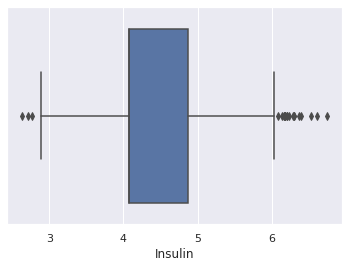

In [3049]:
sns.boxplot(df['Insulin'])

#### Dropping the lesser values

In [3050]:
df.drop(df[(df['Insulin'] < 3 ) | (df['Insulin'] >5.8 ) ].index , inplace = True)


#### Distribution plot of Insulin

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

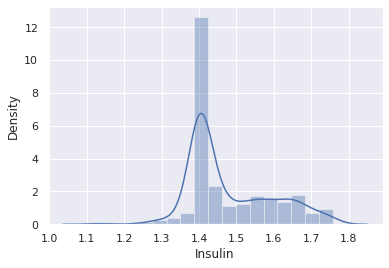

In [3051]:
sns.distplot(np.log(df['Insulin']))

#### Boxcox Transformation in case of emergecny

In [3052]:
def bxcx(col):
    data = df[col].values
    df[col], fitted_lambda= scipy.stats.boxcox(data[data > 0])
    sns.boxplot(x=col,data=df)

#### Dropping the lesser values

In [3053]:
df.drop(df[(df['BMI'] < 20 )].index , inplace = True)


#### Replacing the values with median

In [3054]:
df['BMI'][(df['BMI']<=20) | (df['BMI']>=45) ]=np.median(df['BMI'])

#### Boxplot for outl;ier detection

<AxesSubplot:xlabel='BMI'>

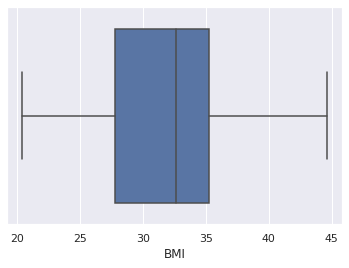

In [3055]:
sns.boxplot(df["BMI"])

#### Distribution plot of BMI

<AxesSubplot:xlabel='BMI', ylabel='Density'>

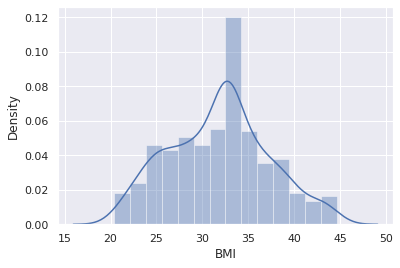

In [3056]:
sns.distplot(df['BMI'])

### SKewness of the BMI

In [3057]:
df['BMI'].skew()

0.08935015359874822

#### DiabetesPedigreeFunction

In [3058]:
max(df['DiabetesPedigreeFunction'])

111.0

In [3059]:
df['DiabetesPedigreeFunction'][df['DiabetesPedigreeFunction']>=1]=np.median(df['DiabetesPedigreeFunction'])

In [3060]:
df['DiabetesPedigreeFunction'].value_counts()

0.400    74
0.254     5
0.207     5
0.268     5
0.197     4
         ..
0.485     1
0.464     1
0.549     1
0.145     1
0.804     1
Name: DiabetesPedigreeFunction, Length: 396, dtype: int64

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

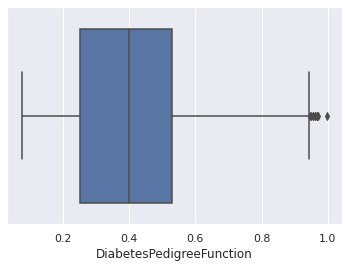

In [3061]:
sns.boxplot(df['DiabetesPedigreeFunction'])

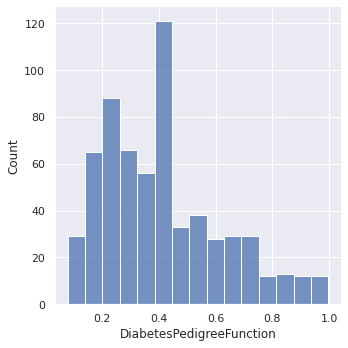

In [3062]:
sns.displot(df['DiabetesPedigreeFunction'])

### Age

In [3063]:
df['Age'][df['Age']>50]=np.median(df['Age'])

<AxesSubplot:xlabel='Age'>

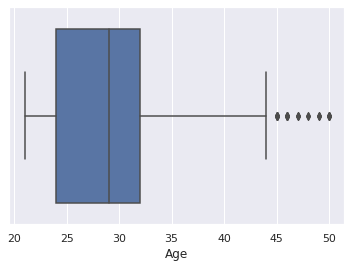

In [3064]:
sns.boxplot(df['Age'])

In [3065]:
df['Age']=np.log(df['Age'])

<AxesSubplot:xlabel='Age'>

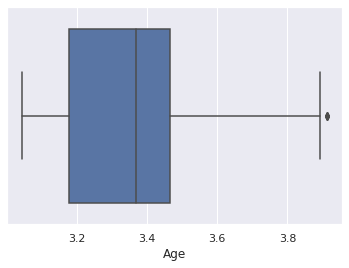

In [3066]:
sns.boxplot((df['Age']))

<AxesSubplot:xlabel='Age', ylabel='Density'>

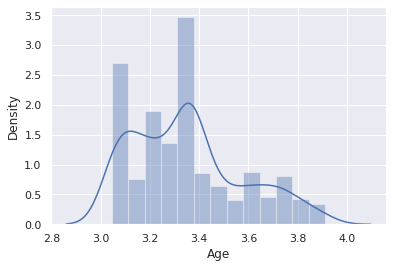

In [3067]:
sns.distplot(df['Age'])

In [3068]:
df['Age'].skew()

0.600237860019242

### Statistical Description of the Dataframe

#### Shape of the Dataset

In [3069]:
df.shape

(631, 9)

#### <span style="color:#fa2ab6">Divide the Data into inputs And Output

In [3070]:
inputs=df.iloc[:,0:8]
output=df.iloc[:,8:]


In [3071]:
output

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
759,1.0
764,0.0
765,0.0
766,1.0


#### Initializing the Parameters for XGboost

In [3072]:
params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]
}

#### Import Randomizedsearcv and xgboost

In [3073]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

#### Cheacking the Null Values in  Dataset

In [3074]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Module For Timer 

In [3075]:
def timer(start_time=None):
    if not start_time:
        start_time=datetime.now()
        return start_time
    elif start_time:
        thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec=divmod(temp_sec,60)
        print('Time Taken %i Hours %i Mintues %i Seconds.'%(thour,tmin,round(tsec,2)))
    

#### Creating the Classifier/Model

In [3076]:
classifier=xgboost.XGBClassifier()

#### Finding out the best Parameters using Random Search

In [3077]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=0)
from datetime import datetime
start_time=timer(None)
random_search.fit(inputs,output)
timer(start_time)

[06:35:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:35:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:35:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:35:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

#### List out the best parameter for Xgboost

In [3078]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Define the Classifier with best parameters provided by Random search

In [3079]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None,eval_metric='mlogloss')


### Importing the Cross validation module from sklearn

In [3080]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,inputs,output,cv=10)

[06:35:28] WARNING: ../src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:35:28] WARNING: ../src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:35:28] WARNING: ../src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

In [3081]:
np.mean(score)

0.7780505952380952

#### Strtified K-Fold

In [3082]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import r2_score
acc=[]
r2=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(inputs,output)
for train_index,test_index in skf.split(inputs,output):
    #print(train_index,' ',test_index)
    x_train,x_test=inputs.iloc[train_index],inputs.iloc[test_index]
    y_train,y_test=output.iloc[train_index],output.iloc[test_index]
    classifier.fit(x_train,y_train)
    pred=classifier.predict(x_test)
    score=accuracy_score(pred,y_test)
    r2.append(r2_score(y_test, pred))
    acc.append(score)

    
print(r2)

[06:35:29] WARNING: ../src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:35:29] WARNING: ../src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[06:35:30] WARNING: ../src/learner.cc:541: 
Parameters: { scale_pos_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above c

### R2 score

In [3092]:
np.mean(r2)

0.9992262090122871

#### Testing the model with manual testing values

In [3083]:

test1=[[6,148,72,35,0,33,0.8,54]]
test2= pd.DataFrame(test1,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],dtype=float)
# type(test2)
p=classifier.predict(test2)
print("Diabetes [0 - No Yes - 1] :\n Result : ",p[0])

Diabetes [0 - No Yes - 1] :
 Result :  0.0


#### average of All accuracy Scores

In [3084]:
np.array(acc).mean()

0.7780505952380952

#### Export the model into the pickle file

In [3085]:
import pickle
with open('./PIMA INDIAN DIABETES PREDICTOR.pickle','wb') as f:
    pickle.dump(classifier,f)
    save_model=pickle.dumps(classifier)

#### Load the Model From the Pickle File and call the model

In [3086]:
saved_model= pickle.loads(save_model)
  
test1=pd.DataFrame([[6,148,72,35,0,33,0.8,54]])
#test2= pd.DataFrame(test1,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],dtype=float)
# type(test2)
saved_model.predict(test2)[0]

0.0

In [3087]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,3.555348,4.069027,33.6,0.627,3.912023,1.0
1,1.0,85.0,66.0,3.367296,4.069027,26.6,0.351,3.433987,0.0
2,8.0,183.0,64.0,3.218876,4.069027,23.3,0.672,3.465736,1.0
3,1.0,89.0,66.0,3.135494,4.543295,28.1,0.167,3.044522,0.0
4,0.0,137.0,40.0,3.555348,5.123964,43.1,0.400,3.496508,1.0


In [3088]:
test1=[[6,200,72,3.5,4,33.6,0.9,4]]
test2= pd.DataFrame(test1,columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age'],dtype=float)
# type(test2)

In [3089]:
saved_model.predict(test2)[0]

1.0

In [3090]:
import json
columns={
    'data_columns':['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
}
with open("./Columns.json","w") as f:
    f.write(json.dumps(columns))
    k=(json.dumps(columns))